In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn xgboost

Note: you may need to restart the kernel to use updated packages.


# 1. Understanding the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import xgboost as XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the datasets
district_rainfall = pd.read_csv('district wise rainfall normal.csv')
historical_rainfall = pd.read_csv('rainfall in india 1901-2015.csv')

In [4]:
# Display basic information about the datasets
print("District Rainfall Dataset:")
print(district_rainfall.head())
print("\nShape:", district_rainfall.shape)
print("\nColumns:", district_rainfall.columns.tolist())
print("\nMissing values:", district_rainfall.isnull().sum().sum())

print("\n\nHistorical Rainfall Dataset:")
print(historical_rainfall.head())
print("\nShape:", historical_rainfall.shape)
print("\nColumns:", historical_rainfall.columns.tolist())
print("\nMissing values:", historical_rainfall.isnull().sum().sum())

District Rainfall Dataset:
                 STATE_UT_NAME       DISTRICT    JAN   FEB    MAR    APR  \
0  ANDAMAN And NICOBAR ISLANDS        NICOBAR  107.3  57.9   65.2  117.0   
1  ANDAMAN And NICOBAR ISLANDS  SOUTH ANDAMAN   43.7  26.0   18.6   90.5   
2  ANDAMAN And NICOBAR ISLANDS  N & M ANDAMAN   32.7  15.9    8.6   53.4   
3            ARUNACHAL PRADESH          LOHIT   42.2  80.8  176.4  358.5   
4            ARUNACHAL PRADESH     EAST SIANG   33.3  79.5  105.9  216.5   

     MAY    JUN    JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  \
0  358.5  295.5  285.0  271.9  354.8  326.0  315.2  250.9  2805.2    165.2   
1  374.4  457.2  421.3  423.1  455.6  301.2  275.8  128.3  3015.7     69.7   
2  343.6  503.3  465.4  460.9  454.8  276.1  198.6  100.0  2913.3     48.6   
3  306.4  447.0  660.1  427.8  313.6  167.1   34.1   29.8  3043.8    123.0   
4  323.0  738.3  990.9  711.2  568.0  206.9   29.5   31.7  4034.7    112.8   

   Mar-May  Jun-Sep  Oct-Dec  
0    540.7   120

# 2. Data Preprocessing and Exploratory Data Analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
district_rainfall = pd.read_csv('district wise rainfall normal.csv')
historical_rainfall = pd.read_csv('rainfall in india 1901-2015.csv')

In [6]:
# Handle missing values
historical_rainfall = historical_rainfall.fillna(historical_rainfall.mean())

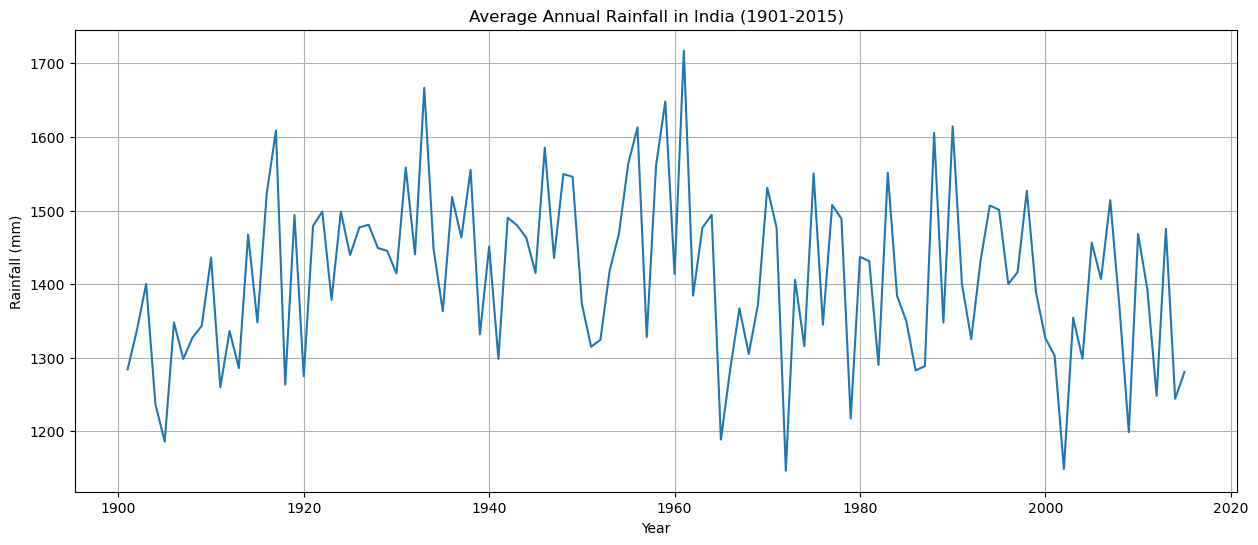

In [7]:
# 1. Yearly rainfall trend
plt.figure(figsize=(15, 6))
yearly_rainfall = historical_rainfall.groupby('YEAR')['ANNUAL'].mean()
plt.plot(yearly_rainfall.index, yearly_rainfall.values)
plt.title('Average Annual Rainfall in India (1901-2015)')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()
plt.savefig('yearly_rainfall_trend.png')
plt.close()

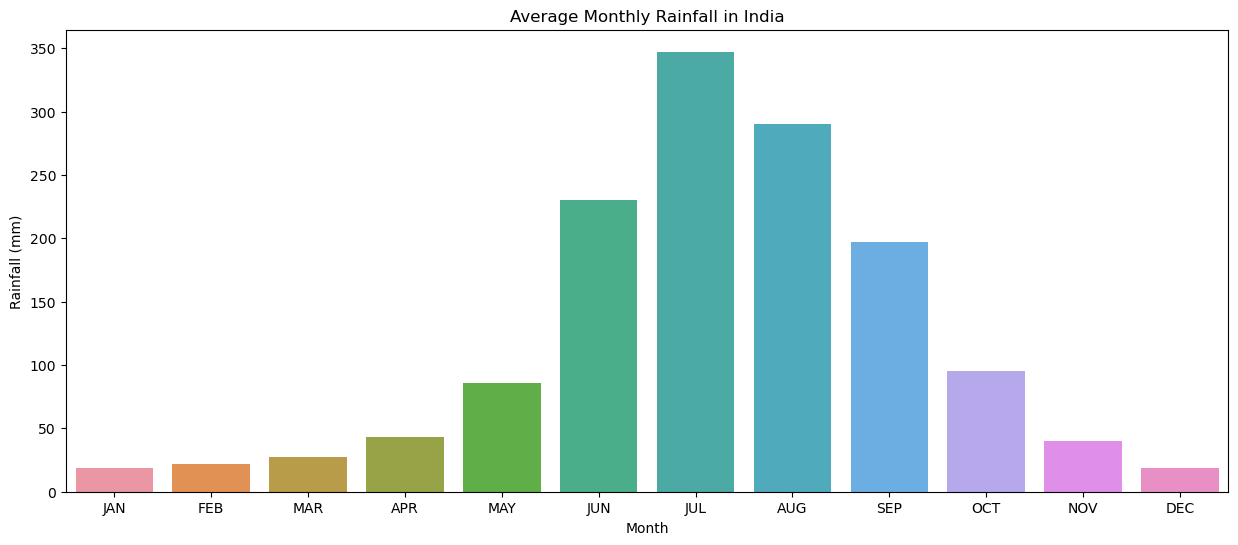

In [8]:
# 2. Monthly rainfall distribution
plt.figure(figsize=(15, 6))
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
monthly_avg = historical_rainfall[months].mean()
sns.barplot(x=months, y=monthly_avg.values)
plt.title('Average Monthly Rainfall in India')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.show()
plt.savefig('monthly_rainfall_distribution.png')
plt.close()

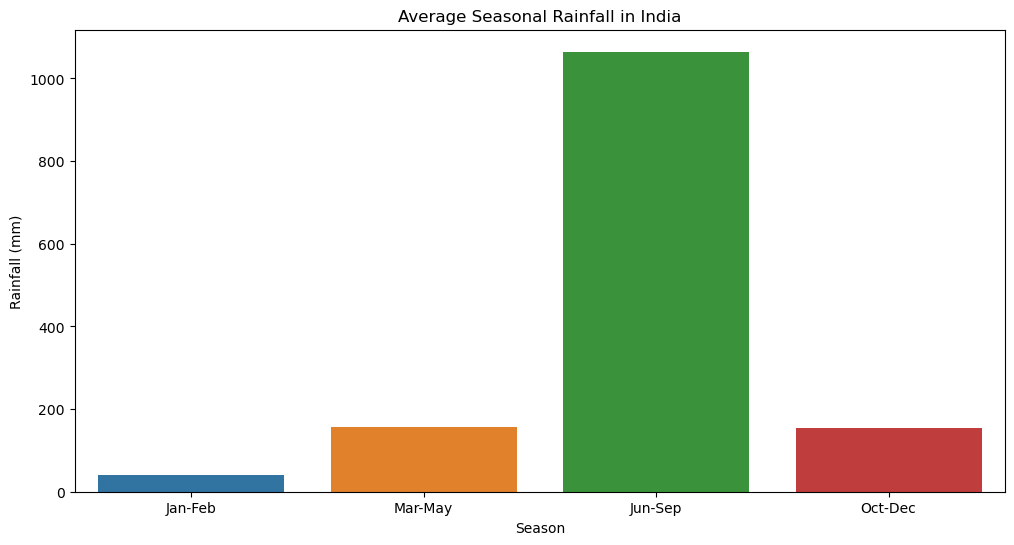

In [9]:
# 3. Seasonal rainfall distribution
plt.figure(figsize=(12, 6))
seasons = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
seasonal_avg = historical_rainfall[seasons].mean()
sns.barplot(x=seasons, y=seasonal_avg.values)
plt.title('Average Seasonal Rainfall in India')
plt.xlabel('Season')
plt.ylabel('Rainfall (mm)')
plt.show()
plt.savefig('seasonal_rainfall_distribution.png')
plt.close()

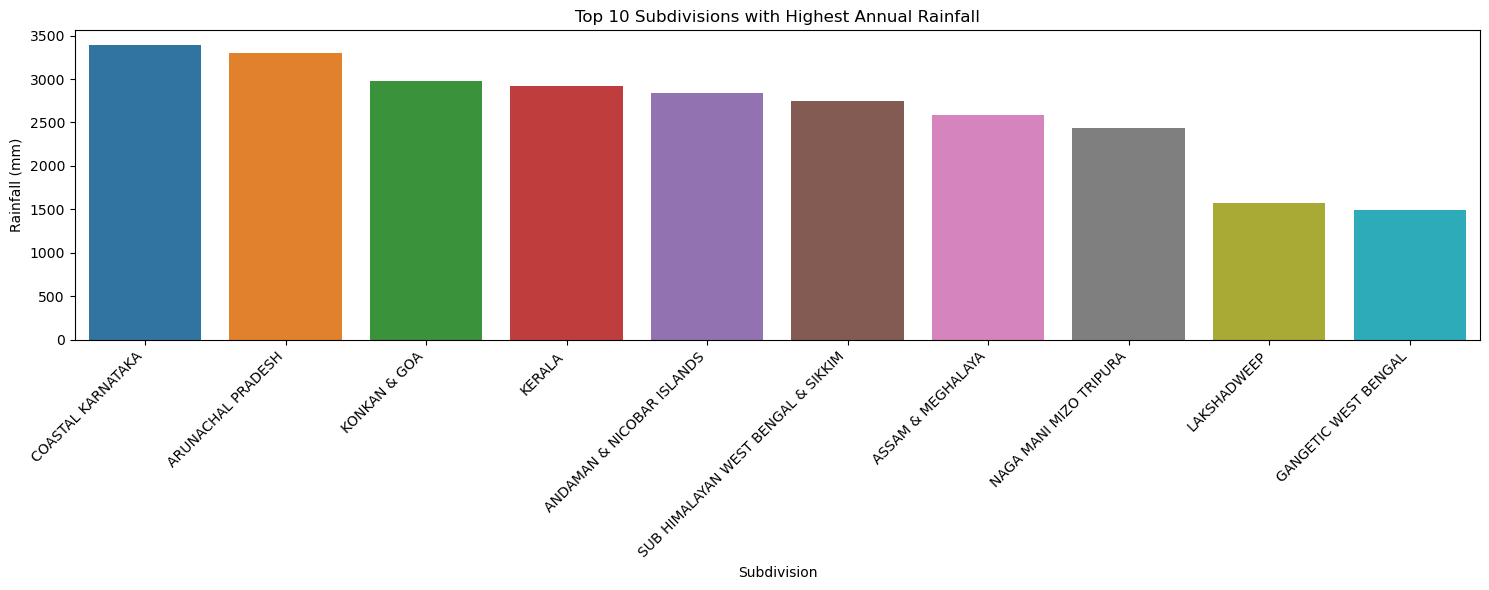

In [10]:
# 4. Top 10 subdivisions with highest annual rainfall
plt.figure(figsize=(15, 6))
subdivision_rainfall = historical_rainfall.groupby('SUBDIVISION')['ANNUAL'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=subdivision_rainfall.index, y=subdivision_rainfall.values)
plt.title('Top 10 Subdivisions with Highest Annual Rainfall')
plt.xlabel('Subdivision')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig('top_subdivisions_rainfall.png')
plt.close()

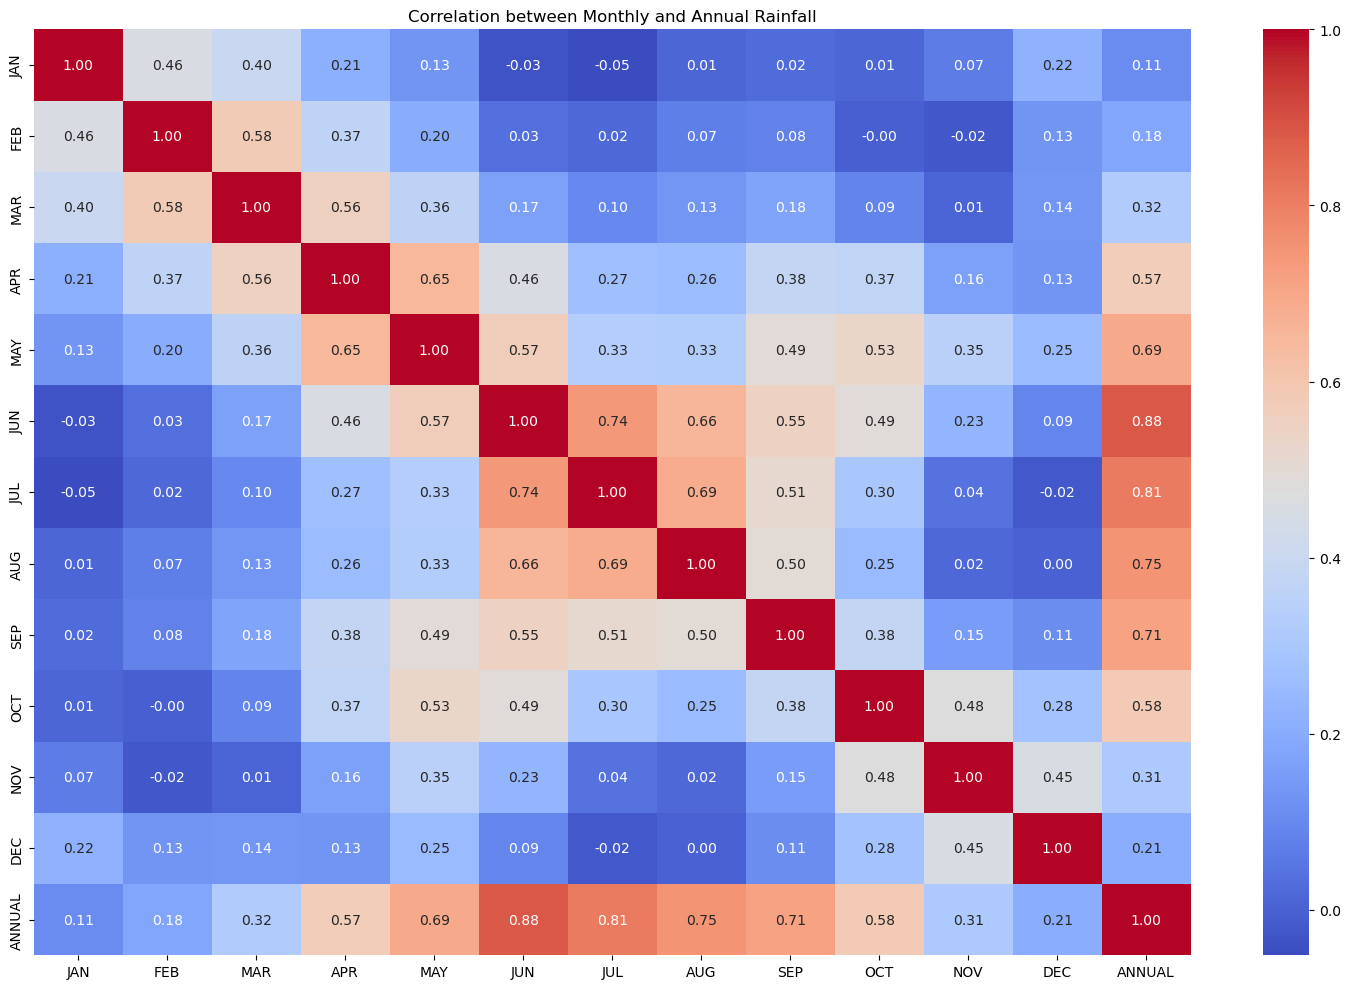

In [11]:
# 5. Correlation heatmap
plt.figure(figsize=(15, 10))
corr = historical_rainfall[months + ['ANNUAL']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Monthly and Annual Rainfall')
plt.tight_layout()
plt.show()
plt.savefig('correlation_heatmap.png')
plt.close()

In [12]:
print("EDA completed and visualizations saved!")

EDA completed and visualizations saved!


# 3. Model Building for Rainfall Prediction

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Load the historical rainfall dataset
df = pd.read_csv('rainfall in india 1901-2015.csv')

In [15]:
# Handle missing values
df = df.fillna(df.mean())

In [16]:
# Feature Engineering
# Create a binary target variable for classification (Rain or No Rain)
# Let's consider it as "Rain" if annual rainfall > median, otherwise "No Rain"
median_rainfall = df['ANNUAL'].median()
df['RAIN_LABEL'] = (df['ANNUAL'] > median_rainfall).astype(int)

In [17]:
# Prepare features and target variables
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
seasons = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']

In [18]:
# For classification
X_class = df[months + seasons]
y_class = df['RAIN_LABEL']

In [19]:
# For regression
X_reg = df[months + seasons]
y_reg = df['ANNUAL']

In [20]:
# Split the data
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [21]:
# Scale the features
scaler = StandardScaler()
X_class_train_scaled = scaler.fit_transform(X_class_train)
X_class_test_scaled = scaler.transform(X_class_test)
X_reg_train_scaled = scaler.fit_transform(X_reg_train)
X_reg_test_scaled = scaler.transform(X_reg_test)


In [22]:
# Classification Models
models_class = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier()
}


In [23]:
# Regression Models
models_reg = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor()
}

In [24]:
# Train and evaluate classification models
class_results = {}
for name, model in models_class.items():
    model.fit(X_class_train_scaled, y_class_train)
    y_pred = model.predict(X_class_test_scaled)
    
    accuracy = accuracy_score(y_class_test, y_pred)
    precision = precision_score(y_class_test, y_pred)
    recall = recall_score(y_class_test, y_pred)
    f1 = f1_score(y_class_test, y_pred)
    
    class_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

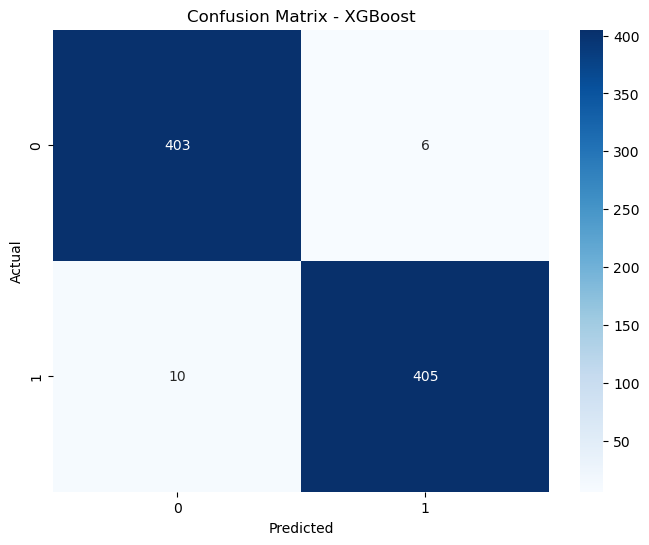

In [25]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_class_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.savefig(f'confusion_matrix_{name.replace(" ", "_").lower()}.png')
plt.close()

In [26]:
# Train and evaluate regression models
reg_results = {}
for name, model in models_reg.items():
    model.fit(X_reg_train_scaled, y_reg_train)
    y_pred = model.predict(X_reg_test_scaled)
    
    mse = mean_squared_error(y_reg_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_reg_test, y_pred)
    
    reg_results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2
    }

In [27]:
# Print classification results
print("Classification Model Results:")
for name, metrics in class_results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

Classification Model Results:

Logistic Regression:
Accuracy: 0.9939
Precision: 0.9976
Recall: 0.9904
F1 Score: 0.9940

Decision Tree:
Accuracy: 0.9527
Precision: 0.9519
Recall: 0.9542
F1 Score: 0.9531

Random Forest:
Accuracy: 0.9697
Precision: 0.9803
Recall: 0.9590
F1 Score: 0.9695

XGBoost:
Accuracy: 0.9806
Precision: 0.9854
Recall: 0.9759
F1 Score: 0.9806


In [28]:
# Print regression results
print("\n\nRegression Model Results:")
for name, metrics in reg_results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")



Regression Model Results:

Linear Regression:
MSE: 1854.1120
RMSE: 43.0594
R2 Score: 0.9979

Decision Tree:
MSE: 33236.8099
RMSE: 182.3097
R2 Score: 0.9620

Random Forest:
MSE: 9330.1615
RMSE: 96.5928
R2 Score: 0.9893

XGBoost:
MSE: 13192.4514
RMSE: 114.8584
R2 Score: 0.9849


In [29]:
# Find the best models
best_class_model = max(class_results.items(), key=lambda x: x[1]['F1 Score'])
best_reg_model = max(reg_results.items(), key=lambda x: x[1]['R2 Score'])

print(f"\n\nBest Classification Model: {best_class_model[0]} with F1 Score: {best_class_model[1]['F1 Score']:.4f}")
print(f"Best Regression Model: {best_reg_model[0]} with R2 Score: {best_reg_model[1]['R2 Score']:.4f}")



Best Classification Model: Logistic Regression with F1 Score: 0.9940
Best Regression Model: Linear Regression with R2 Score: 0.9979


In [30]:
# Save the best models for later use
import joblib

# Save the best classification model
best_class = models_class[best_class_model[0]]
joblib.dump(best_class, 'best_classification_model.pkl')

# Save the best regression model
best_reg = models_reg[best_reg_model[0]]
joblib.dump(best_reg, 'best_regression_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print("\nBest models saved successfully!")


Best models saved successfully!


# 4. Hyperparameter Tuning

In [31]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import f1_score, r2_score

In [32]:
# Load the data
df = pd.read_csv('rainfall in india 1901-2015.csv')
df = df.fillna(df.mean())

In [33]:
# Feature Engineering
median_rainfall = df['ANNUAL'].median()
df['RAIN_LABEL'] = (df['ANNUAL'] > median_rainfall).astype(int)

months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
seasons = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']

In [34]:
# For classification
X_class = df[months + seasons]
y_class = df['RAIN_LABEL']

In [35]:
# For regression
X_reg = df[months + seasons]
y_reg = df['ANNUAL']

In [36]:
# Split the data
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [37]:
# Scale the features
scaler = StandardScaler()
X_class_train_scaled = scaler.fit_transform(X_class_train)
X_class_test_scaled = scaler.transform(X_class_test)
X_reg_train_scaled = scaler.fit_transform(X_reg_train)
X_reg_test_scaled = scaler.transform(X_reg_test)

In [38]:
# Hyperparameter tuning for Random Forest Classifier
rf_class_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_class = RandomForestClassifier(random_state=42)
grid_search_rf_class = GridSearchCV(rf_class, rf_class_params, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf_class.fit(X_class_train_scaled, y_class_train)

print("Best parameters for Random Forest Classifier:")
print(grid_search_rf_class.best_params_)
best_rf_class = grid_search_rf_class.best_estimator_

Best parameters for Random Forest Classifier:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [39]:
# Hyperparameter tuning for XGBoost Classifier
xgb_class_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

xgb_class = xgb.XGBClassifier(random_state=42)
grid_search_xgb_class = GridSearchCV(xgb_class, xgb_class_params, cv=5, scoring='f1', n_jobs=-1)
grid_search_xgb_class.fit(X_class_train_scaled, y_class_train)

print("\nBest parameters for XGBoost Classifier:")
print(grid_search_xgb_class.best_params_)
best_xgb_class = grid_search_xgb_class.best_estimator_


Best parameters for XGBoost Classifier:
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [40]:
# Hyperparameter tuning for Random Forest Regressor
rf_reg_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_reg = RandomForestRegressor(random_state=42)
grid_search_rf_reg = GridSearchCV(rf_reg, rf_reg_params, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf_reg.fit(X_reg_train_scaled, y_reg_train)

print("\nBest parameters for Random Forest Regressor:")
print(grid_search_rf_reg.best_params_)
best_rf_reg = grid_search_rf_reg.best_estimator_



Best parameters for Random Forest Regressor:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [41]:
# Hyperparameter tuning for XGBoost Regressor
xgb_reg_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

xgb_reg = xgb.XGBRegressor(random_state=42)
grid_search_xgb_reg = GridSearchCV(xgb_reg, xgb_reg_params, cv=5, scoring='r2', n_jobs=-1)
grid_search_xgb_reg.fit(X_reg_train_scaled, y_reg_train)

print("\nBest parameters for XGBoost Regressor:")
print(grid_search_xgb_reg.best_params_)
best_xgb_reg = grid_search_xgb_reg.best_estimator_


Best parameters for XGBoost Regressor:
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}


In [42]:
# Evaluate the tuned models
# Classification
rf_class_pred = best_rf_class.predict(X_class_test_scaled)
xgb_class_pred = best_xgb_class.predict(X_class_test_scaled)

rf_class_f1 = f1_score(y_class_test, rf_class_pred)
xgb_class_f1 = f1_score(y_class_test, xgb_class_pred)

print("\nRandom Forest Classifier F1 Score after tuning:", rf_class_f1)
print("XGBoost Classifier F1 Score after tuning:", xgb_class_f1)


Random Forest Classifier F1 Score after tuning: 0.9709443099273607
XGBoost Classifier F1 Score after tuning: 0.9818621523579202


In [43]:
# Regression
rf_reg_pred = best_rf_reg.predict(X_reg_test_scaled)
xgb_reg_pred = best_xgb_reg.predict(X_reg_test_scaled)

rf_reg_r2 = r2_score(y_reg_test, rf_reg_pred)
xgb_reg_r2 = r2_score(y_reg_test, xgb_reg_pred)

print("\nRandom Forest Regressor R2 Score after tuning:", rf_reg_r2)
print("XGBoost Regressor R2 Score after tuning:", xgb_reg_r2)


Random Forest Regressor R2 Score after tuning: 0.9916223613592144
XGBoost Regressor R2 Score after tuning: 0.9865941123151958


In [44]:
# Save the best tuned models
if rf_class_f1 > xgb_class_f1:
    best_class_model = best_rf_class
    print("\nBest Classification Model: Random Forest")
else:
    best_class_model = best_xgb_class
    print("\nBest Classification Model: XGBoost")

if rf_reg_r2 > xgb_reg_r2:
    best_reg_model = best_rf_reg
    print("Best Regression Model: Random Forest")
else:
    best_reg_model = best_xgb_reg
    print("Best Regression Model: XGBoost")

joblib.dump(best_class_model, 'best_tuned_classification_model.pkl')
joblib.dump(best_reg_model, 'best_tuned_regression_model.pkl')
joblib.dump(scaler, 'tuned_scaler.pkl')

print("\nTuned models saved successfully!")


Best Classification Model: XGBoost
Best Regression Model: Random Forest

Tuned models saved successfully!


# 5. Feature Importance Analysis

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import seaborn as sns

In [46]:
# Load the best models
best_class_model = joblib.load('best_tuned_classification_model.pkl')
best_reg_model = joblib.load('best_tuned_regression_model.pkl')

In [47]:
# Feature names
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
seasons = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
features = months + seasons

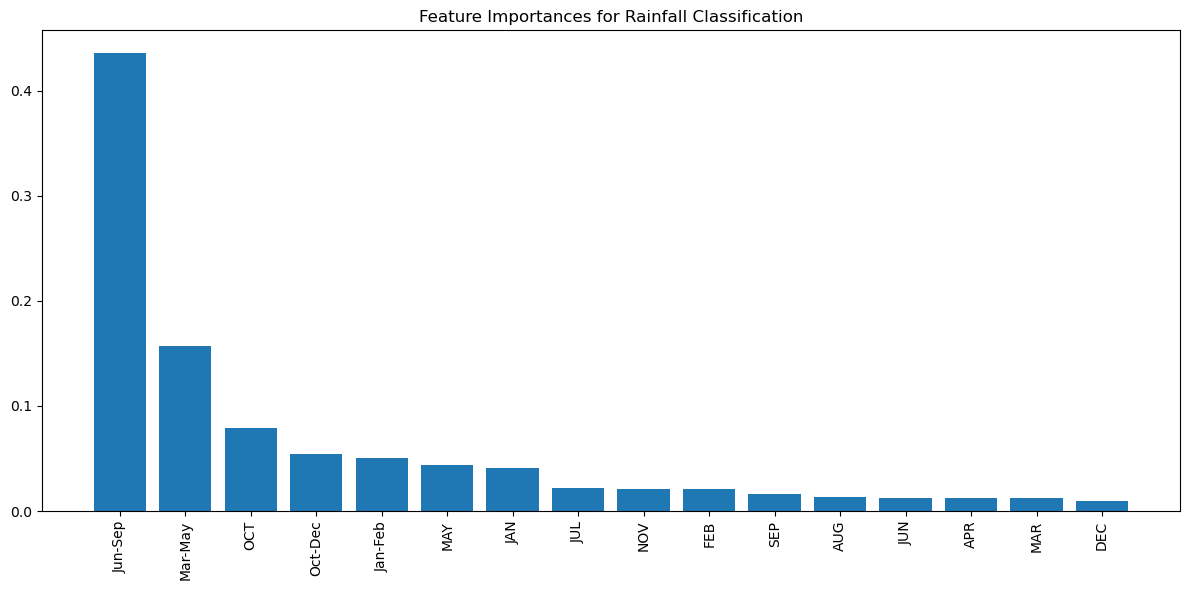

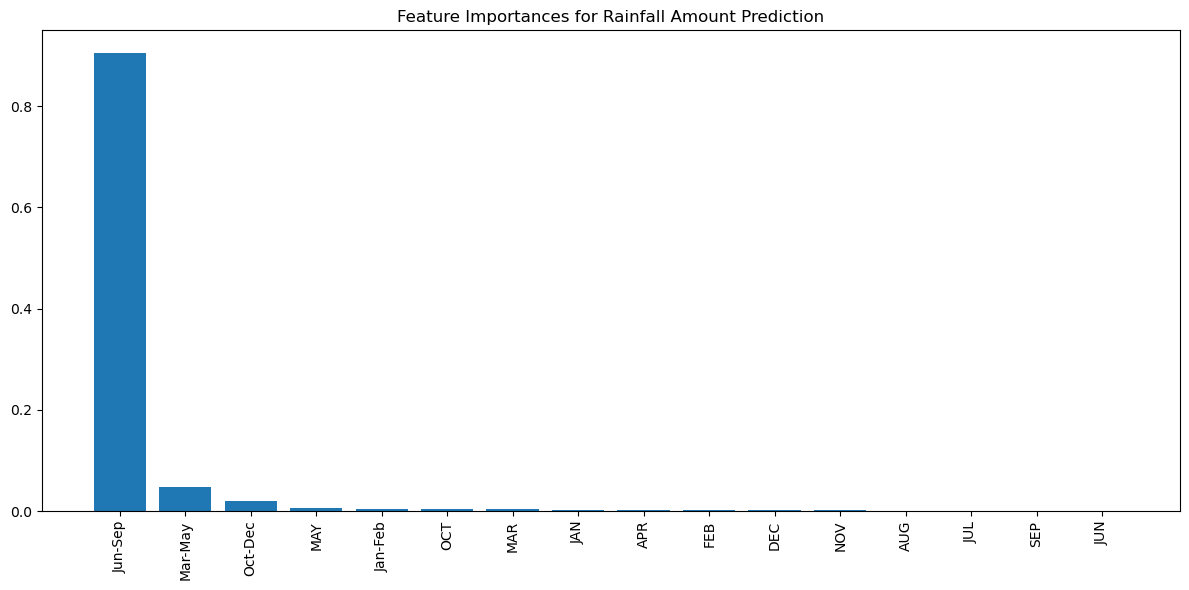

Top 5 Important Features for Rainfall Classification:
Jun-Sep: 0.4356
Mar-May: 0.1569
Oct-Dec: 0.0539
MAY: 0.0442
Jan-Feb: 0.0505

Top 5 Important Features for Rainfall Amount Prediction:
Jun-Sep: 0.9048
Mar-May: 0.0480
Oct-Dec: 0.0206
MAY: 0.0054
Jan-Feb: 0.0040


In [48]:
# Get feature importances
try:
    class_importances = best_class_model.feature_importances_
    reg_importances = best_reg_model.feature_importances_
    
    # Plot feature importances for classification model
    plt.figure(figsize=(12, 6))
    indices = np.argsort(class_importances)[::-1]
    plt.title('Feature Importances for Rainfall Classification')
    plt.bar(range(len(features)), class_importances[indices], align='center')
    plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()
    plt.savefig('classification_feature_importance.png')
    plt.close()
    
    # Plot feature importances for regression model
    plt.figure(figsize=(12, 6))
    indices = np.argsort(reg_importances)[::-1]
    plt.title('Feature Importances for Rainfall Amount Prediction')
    plt.bar(range(len(features)), reg_importances[indices], align='center')
    plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()
    plt.savefig('regression_feature_importance.png')
    plt.close()
    
    # Print top 5 important features
    print("Top 5 Important Features for Rainfall Classification:")
    for i in range(5):
        print(f"{features[indices[i]]}: {class_importances[indices[i]]:.4f}")
    
    print("\nTop 5 Important Features for Rainfall Amount Prediction:")
    indices = np.argsort(reg_importances)[::-1]
    for i in range(5):
        print(f"{features[indices[i]]}: {reg_importances[indices[i]]:.4f}")
        
except AttributeError:
    print("Feature importance not available for the selected models.")

# 6. Building a Simple Web App with Streamlit

2025-05-14 20:57:45.986 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 20:57:45.990 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-05-14 20:57:45.991 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 20:57:46.709 
  command:

    streamlit run d:\Python_TYL\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-14 20:57:46.710 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 20:57:46.711 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 20:57:46.844 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare m

DeltaGenerator()

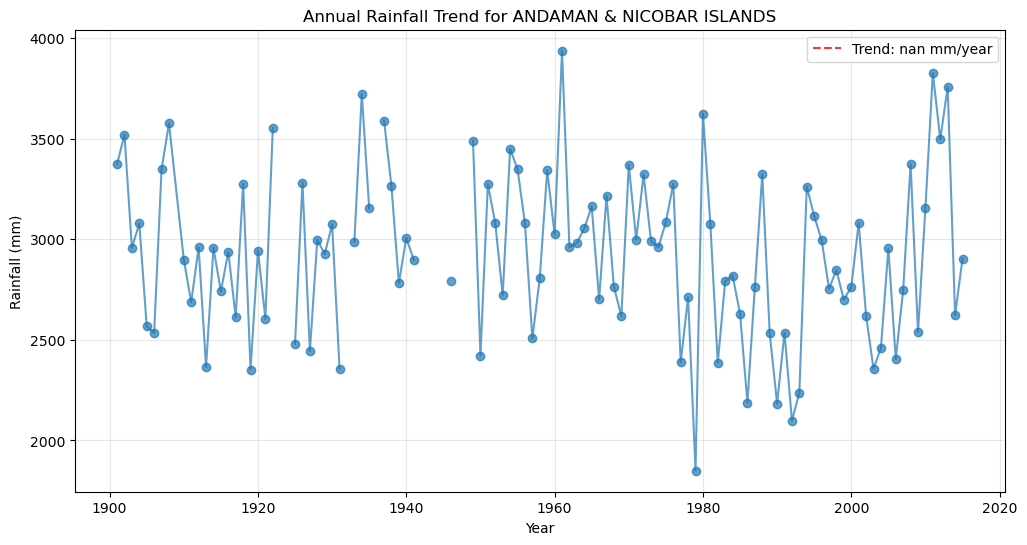

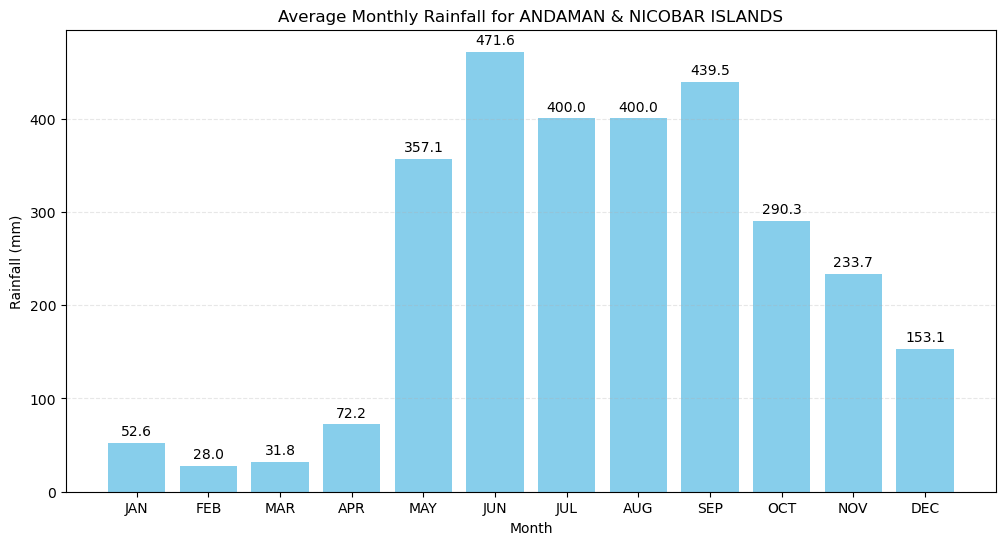

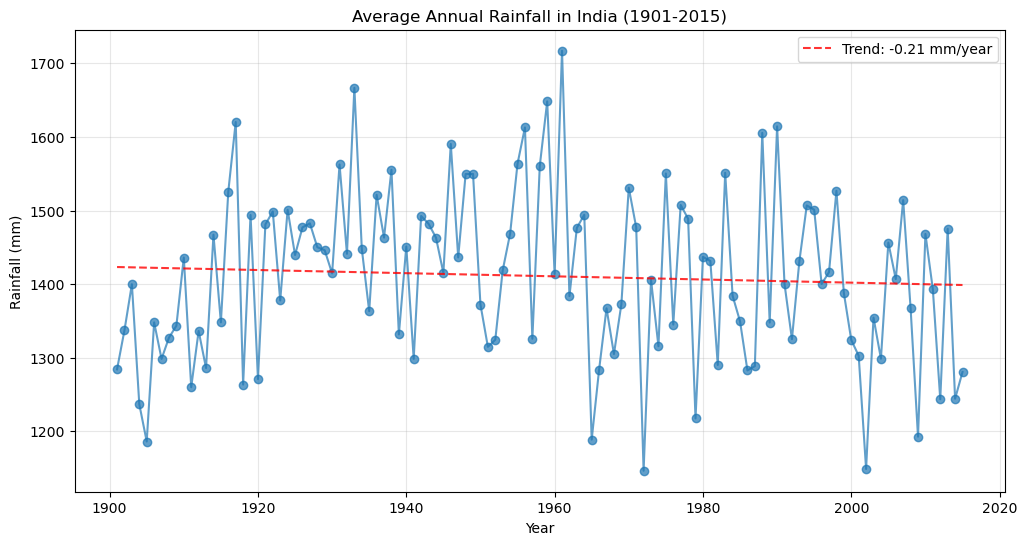

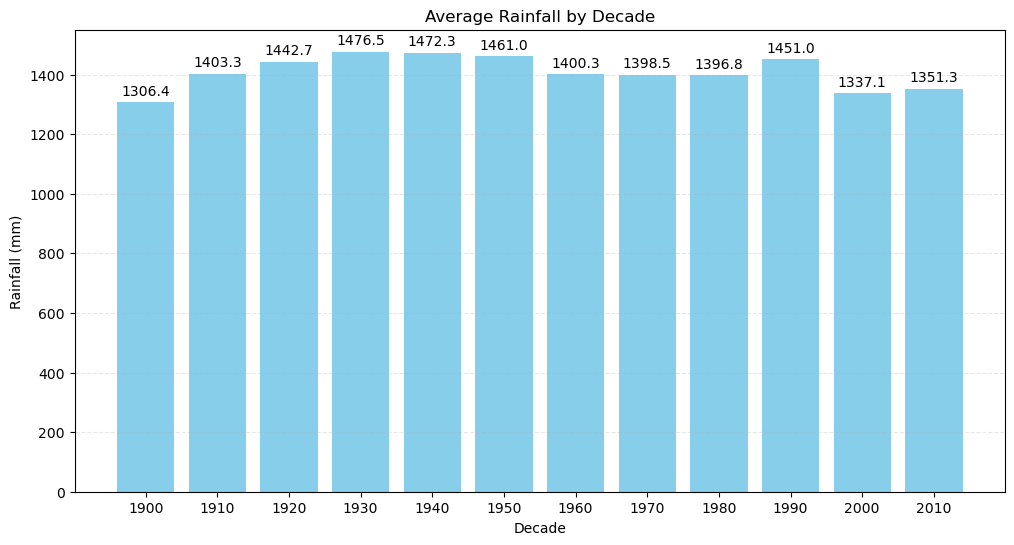

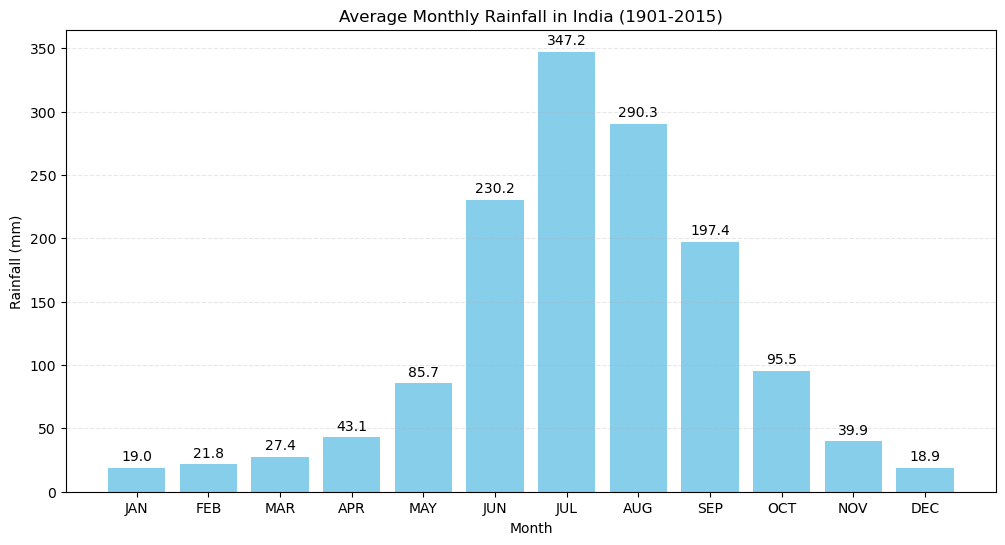

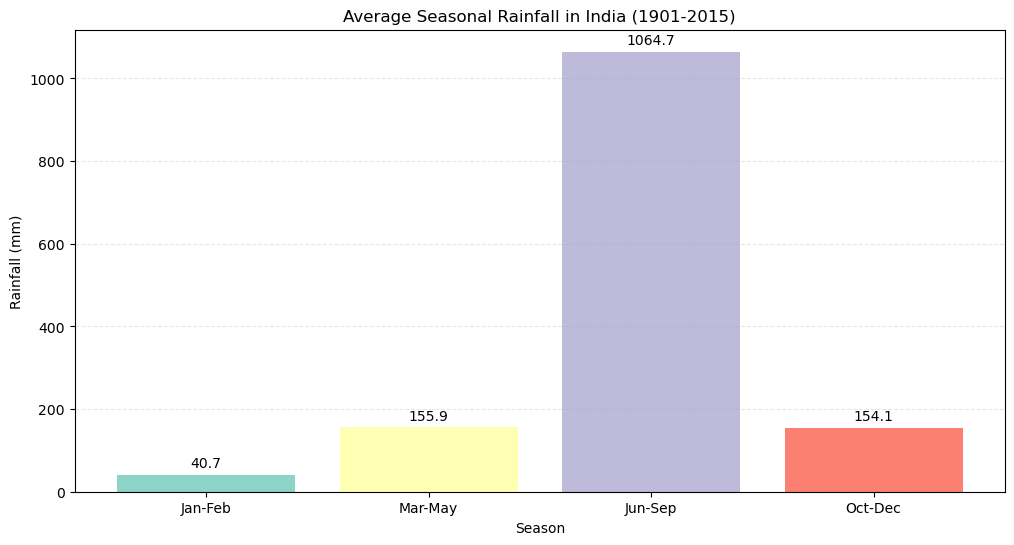

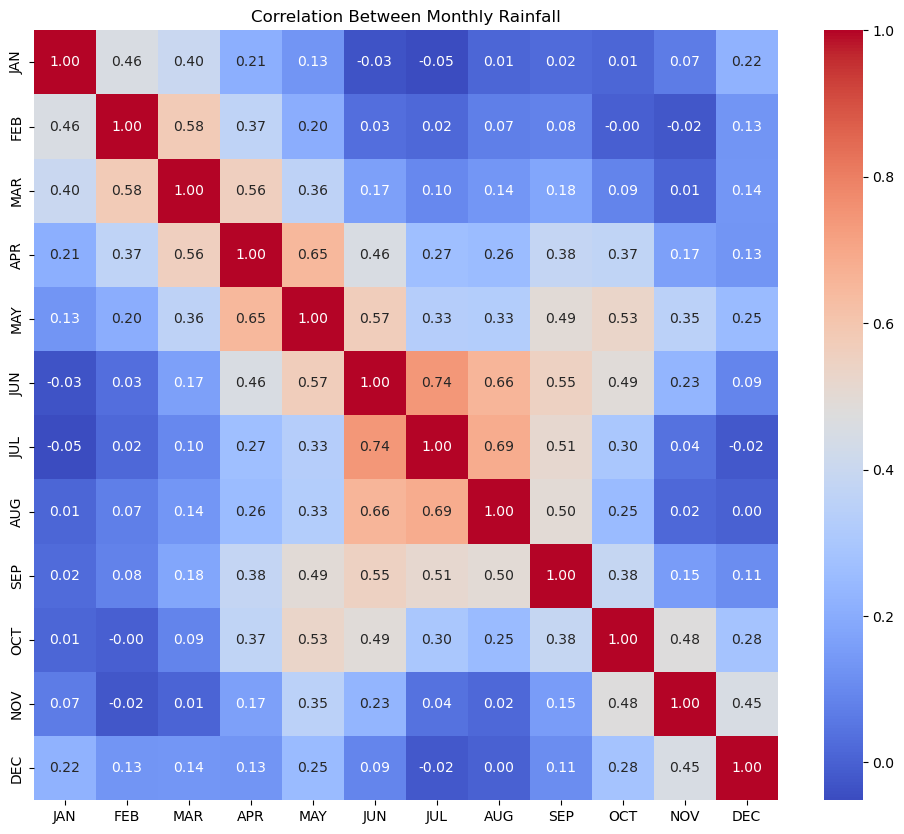

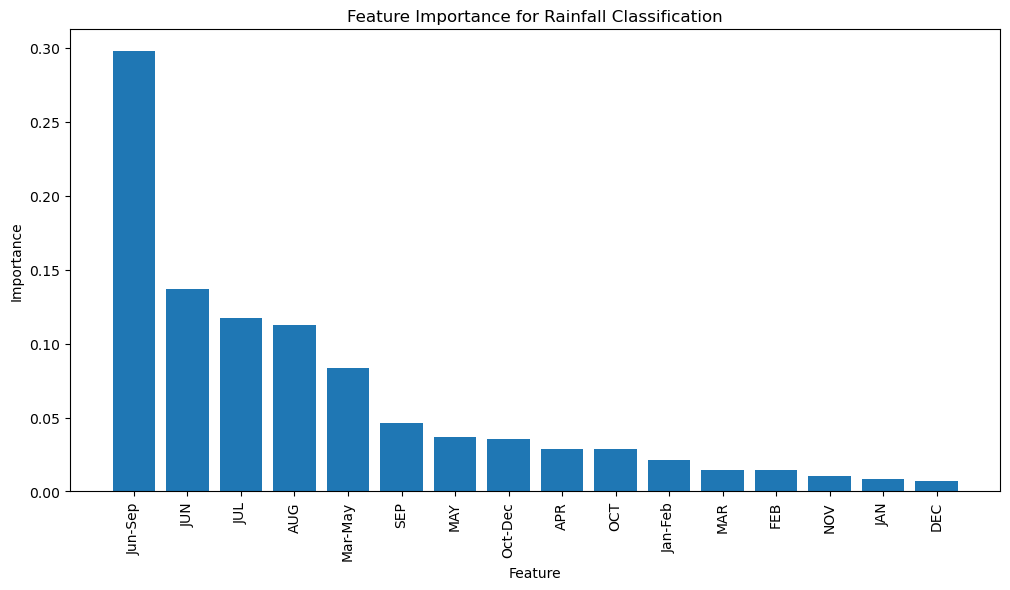

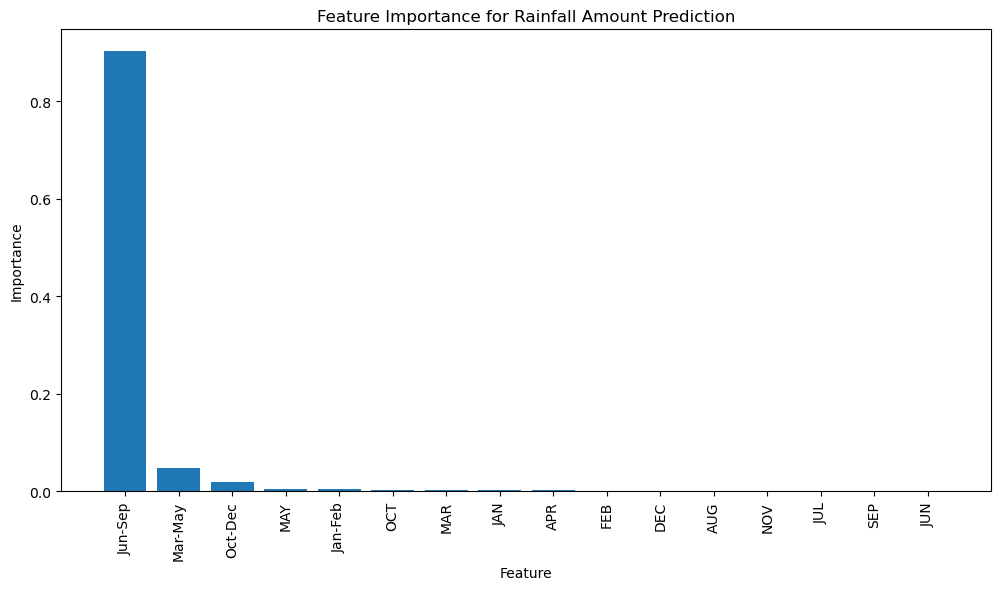

In [49]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# Set page configuration
st.set_page_config(
    page_title="Rainfall Prediction App",
    page_icon="🌧️",
    layout="wide"
)

# Load the models and scaler
@st.cache_resource
def load_models():
    model_path = "d:\\Users\\Rakshitha M R\\Downloads\\Rainfall_Prediction\\"
    
    # Check which models exist and load them
    models = {}
    
    if os.path.exists(model_path + "best_rf_classifier.pkl"):
        models['classifier'] = joblib.load(model_path + "best_rf_classifier.pkl")
    elif os.path.exists(model_path + "best_xgb_classifier.pkl"):
        models['classifier'] = joblib.load(model_path + "best_xgb_classifier.pkl")
    
    if os.path.exists(model_path + "best_rf_regressor.pkl"):
        models['regressor'] = joblib.load(model_path + "best_rf_regressor.pkl")
    elif os.path.exists(model_path + "best_xgb_regressor.pkl"):
        models['regressor'] = joblib.load(model_path + "best_xgb_regressor.pkl")
    
    if os.path.exists(model_path + "scaler.pkl"):
        models['scaler'] = joblib.load(model_path + "scaler.pkl")
    
    return models

# Load the datasets
@st.cache_data
def load_data():
    data_path = "d:\\Users\\Rakshitha M R\\Downloads\\Rainfall_Prediction\\"
    district_rainfall = pd.read_csv(data_path + 'district wise rainfall normal.csv')
    historical_rainfall = pd.read_csv(data_path + 'rainfall in india 1901-2015.csv')
    return district_rainfall, historical_rainfall

# Try to load models and data
try:
    models = load_models()
    district_rainfall, historical_rainfall = load_data()
    data_loaded = True
except Exception as e:
    st.error(f"Error loading models or data: {e}")
    data_loaded = False

# App title and description
st.title("🌧️ Rainfall Prediction in India")
st.markdown("""
This application predicts rainfall in India based on historical data. You can:
- Make predictions for rainfall (yes/no and amount)
- Explore historical rainfall patterns
- View insights about different regions
""")

# Create tabs for different functionalities
tab1, tab2, tab3 = st.tabs(["Make Prediction", "Explore Data", "Model Insights"])

with tab1:
    st.header("Rainfall Prediction")
    
    if not data_loaded or 'classifier' not in models or 'regressor' not in models or 'scaler' not in models:
        st.warning("Models not found. Please run the rainfall_prediction.py script first to train and save the models.")
    else:
        st.write("Enter monthly rainfall values to predict annual rainfall and whether it will be above average.")
        
        # Create two columns for input
        col1, col2 = st.columns(2)
        
        # Monthly rainfall inputs
        with col1:
            st.subheader("Monthly Rainfall (mm)")
            jan = st.number_input('January', min_value=0.0, max_value=1000.0, value=20.0)
            feb = st.number_input('February', min_value=0.0, max_value=1000.0, value=30.0)
            mar = st.number_input('March', min_value=0.0, max_value=1000.0, value=40.0)
            apr = st.number_input('April', min_value=0.0, max_value=1000.0, value=50.0)
            may = st.number_input('May', min_value=0.0, max_value=1000.0, value=100.0)
            jun = st.number_input('June', min_value=0.0, max_value=1000.0, value=200.0)
        
        with col2:
            st.subheader("Monthly Rainfall (mm)")
            jul = st.number_input('July', min_value=0.0, max_value=1000.0, value=300.0)
            aug = st.number_input('August', min_value=0.0, max_value=1000.0, value=250.0)
            sep = st.number_input('September', min_value=0.0, max_value=1000.0, value=200.0)
            oct = st.number_input('October', min_value=0.0, max_value=1000.0, value=100.0)
            nov = st.number_input('November', min_value=0.0, max_value=1000.0, value=50.0)
            dec = st.number_input('December', min_value=0.0, max_value=1000.0, value=20.0)
        
        # Calculate seasonal values
        jan_feb = jan + feb
        mar_may = mar + apr + may
        jun_sep = jun + jul + aug + sep
        oct_dec = oct + nov + dec
        
        # Display seasonal values
        st.subheader("Seasonal Rainfall")
        col1, col2, col3, col4 = st.columns(4)
        col1.metric("Jan-Feb", f"{jan_feb:.1f} mm")
        col2.metric("Mar-May", f"{mar_may:.1f} mm")
        col3.metric("Jun-Sep", f"{jun_sep:.1f} mm")
        col4.metric("Oct-Dec", f"{oct_dec:.1f} mm")
        
        # Calculate annual total
        annual_total = jan + feb + mar + apr + may + jun + jul + aug + sep + oct + nov + dec
        st.metric("Annual Total", f"{annual_total:.1f} mm")
        
        # Make prediction when button is clicked
        if st.button('Predict Rainfall'):
            # Prepare input data
            input_data = np.array([[jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec, 
                                   jan_feb, mar_may, jun_sep, oct_dec]])
            
            # Scale the input data
            input_scaled = models['scaler'].transform(input_data)
            
            # Make predictions
            try:
                # Classification prediction
                if hasattr(models['classifier'], 'predict_proba'):
                    rain_prob = models['classifier'].predict_proba(input_scaled)[0][1]
                    rain_class = models['classifier'].predict(input_scaled)[0]
                else:
                    rain_class = models['classifier'].predict(input_scaled)[0]
                    rain_prob = rain_class  # If no predict_proba, just use the class
                
                # Regression prediction
                rain_amount = models['regressor'].predict(input_scaled)[0]
                
                # Display results
                st.subheader("Prediction Results")
                
                # Classification result
                if hasattr(models['classifier'], 'predict_proba'):
                    st.write(f"Probability of Above Average Rainfall: {rain_prob:.2f}")
                
                if rain_class == 1:
                    st.success("Prediction: Above Average Rainfall Expected")
                else:
                    st.warning("Prediction: Below Average Rainfall Expected")
                
                # Regression result
                st.write(f"Predicted Annual Rainfall Amount: {rain_amount:.2f} mm")
                
                # Compare with average
                avg_rainfall = historical_rainfall['ANNUAL'].mean()
                if rain_amount > avg_rainfall:
                    st.write(f"This is above the historical average of {avg_rainfall:.2f} mm")
                else:
                    st.write(f"This is below the historical average of {avg_rainfall:.2f} mm")
                
                # Visualization of the prediction
                fig, ax = plt.subplots(figsize=(10, 6))
                
                # Monthly data
                months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
                monthly_values = [jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec]
                
                # Plot the monthly rainfall
                ax.bar(months, monthly_values, color='skyblue')
                ax.set_title('Monthly Rainfall Distribution')
                ax.set_xlabel('Month')
                ax.set_ylabel('Rainfall (mm)')
                ax.grid(axis='y', linestyle='--', alpha=0.7)
                
                # Add a horizontal line for the average monthly rainfall
                avg_monthly = avg_rainfall / 12
                ax.axhline(y=avg_monthly, color='r', linestyle='-', label=f'Avg Monthly: {avg_monthly:.2f} mm')
                ax.legend()
                
                st.pyplot(fig)
                
            except Exception as e:
                st.error(f"Error making prediction: {e}")

with tab2:
    st.header("Explore Historical Rainfall Data")
    
    if not data_loaded:
        st.warning("Data not loaded. Please check the file paths.")
    else:
        # Create subtabs for different explorations
        explore_tab1, explore_tab2, explore_tab3 = st.tabs(["Subdivision Analysis", "Yearly Trends", "Monthly Patterns"])
        
        with explore_tab1:
            st.subheader("Subdivision Rainfall Analysis")
            
            # Select subdivision
            subdivisions = sorted(historical_rainfall['SUBDIVISION'].unique())
            selected_subdivision = st.selectbox("Select Subdivision", subdivisions)
            
            # Filter data for selected subdivision
            subdivision_data = historical_rainfall[historical_rainfall['SUBDIVISION'] == selected_subdivision]
            
            # Show yearly trend
            fig, ax = plt.subplots(figsize=(12, 6))
            ax.plot(subdivision_data['YEAR'], subdivision_data['ANNUAL'], marker='o', linestyle='-', alpha=0.7)
            ax.set_title(f'Annual Rainfall Trend for {selected_subdivision}')
            ax.set_xlabel('Year')
            ax.set_ylabel('Rainfall (mm)')
            ax.grid(True, alpha=0.3)
            
            # Add trend line
            z = np.polyfit(subdivision_data['YEAR'], subdivision_data['ANNUAL'], 1)
            p = np.poly1d(z)
            ax.plot(subdivision_data['YEAR'], p(subdivision_data['YEAR']), "r--", alpha=0.8, 
                    label=f"Trend: {z[0]:.2f} mm/year")
            ax.legend()
            
            st.pyplot(fig)
            
            # Show monthly average
            months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
            monthly_avg = subdivision_data[months].mean()
            
            fig, ax = plt.subplots(figsize=(12, 6))
            bars = ax.bar(months, monthly_avg, color='skyblue')
            ax.set_title(f'Average Monthly Rainfall for {selected_subdivision}')
            ax.set_xlabel('Month')
            ax.set_ylabel('Rainfall (mm)')
            ax.grid(axis='y', linestyle='--', alpha=0.3)
            
            # Add value labels on top of bars
            for bar in bars:
                height = bar.get_height()
                ax.annotate(f'{height:.1f}',
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', rotation=0)
            
            st.pyplot(fig)
            
            # Show basic statistics
            st.subheader(f"Statistics for {selected_subdivision}")
            stats = subdivision_data['ANNUAL'].describe()
            
            col1, col2, col3, col4 = st.columns(4)
            col1.metric("Average Annual Rainfall", f"{stats['mean']:.2f} mm")
            col2.metric("Minimum (Year)", f"{subdivision_data['ANNUAL'].min():.2f} mm")
            col3.metric("Maximum (Year)", f"{subdivision_data['ANNUAL'].max():.2f} mm")
            col4.metric("Standard Deviation", f"{stats['std']:.2f} mm")
            
            # Show raw data if requested
            if st.checkbox("Show Raw Data"):
                st.dataframe(subdivision_data)
        
        with explore_tab2:
            st.subheader("Yearly Rainfall Trends")
            
            # Calculate yearly averages across all subdivisions
            yearly_avg = historical_rainfall.groupby('YEAR')['ANNUAL'].mean().reset_index()
            
            # Plot the trend
            fig, ax = plt.subplots(figsize=(12, 6))
            ax.plot(yearly_avg['YEAR'], yearly_avg['ANNUAL'], marker='o', linestyle='-', alpha=0.7)
            ax.set_title('Average Annual Rainfall in India (1901-2015)')
            ax.set_xlabel('Year')
            ax.set_ylabel('Rainfall (mm)')
            ax.grid(True, alpha=0.3)
            
            # Add trend line
            z = np.polyfit(yearly_avg['YEAR'], yearly_avg['ANNUAL'], 1)
            p = np.poly1d(z)
            ax.plot(yearly_avg['YEAR'], p(yearly_avg['YEAR']), "r--", alpha=0.8, 
                    label=f"Trend: {z[0]:.2f} mm/year")
            ax.legend()
            
            st.pyplot(fig)
            
            # Show wettest and driest years
            st.subheader("Extreme Years")
            
            col1, col2 = st.columns(2)
            
            # Top 5 wettest years
            wettest_years = yearly_avg.sort_values('ANNUAL', ascending=False).head(5)
            col1.write("Top 5 Wettest Years:")
            col1.dataframe(wettest_years)
            
            # Top 5 driest years
            driest_years = yearly_avg.sort_values('ANNUAL', ascending=True).head(5)
            col2.write("Top 5 Driest Years:")
            col2.dataframe(driest_years)
            
            # Decade-wise analysis
            st.subheader("Decade-wise Rainfall Analysis")
            
            # Create decade column
            historical_rainfall['Decade'] = (historical_rainfall['YEAR'] // 10) * 10
            decade_avg = historical_rainfall.groupby('Decade')['ANNUAL'].mean().reset_index()
            
            fig, ax = plt.subplots(figsize=(12, 6))
            bars = ax.bar(decade_avg['Decade'].astype(str), decade_avg['ANNUAL'], color='skyblue')
            ax.set_title('Average Rainfall by Decade')
            ax.set_xlabel('Decade')
            ax.set_ylabel('Rainfall (mm)')
            ax.grid(axis='y', linestyle='--', alpha=0.3)
            
            # Add value labels on top of bars
            for bar in bars:
                height = bar.get_height()
                ax.annotate(f'{height:.1f}',
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', rotation=0)
            
            st.pyplot(fig)
        
        with explore_tab3:
            st.subheader("Monthly Rainfall Patterns")
            
            # Calculate monthly averages across all years and subdivisions
            months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
            monthly_data = historical_rainfall[months].mean()
            
            # Plot monthly averages
            fig, ax = plt.subplots(figsize=(12, 6))
            bars = ax.bar(months, monthly_data, color='skyblue')
            ax.set_title('Average Monthly Rainfall in India (1901-2015)')
            ax.set_xlabel('Month')
            ax.set_ylabel('Rainfall (mm)')
            ax.grid(axis='y', linestyle='--', alpha=0.3)
            
            # Add value labels on top of bars
            for bar in bars:
                height = bar.get_height()
                ax.annotate(f'{height:.1f}',
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', rotation=0)
            
            st.pyplot(fig)
            
            # Seasonal analysis
            st.subheader("Seasonal Rainfall Analysis")
            
            seasons = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
            seasonal_data = historical_rainfall[seasons].mean()
            
            fig, ax = plt.subplots(figsize=(12, 6))
            bars = ax.bar(seasons, seasonal_data, color=['#8dd3c7', '#ffffb3', '#bebada', '#fb8072'])
            ax.set_title('Average Seasonal Rainfall in India (1901-2015)')
            ax.set_xlabel('Season')
            ax.set_ylabel('Rainfall (mm)')
            ax.grid(axis='y', linestyle='--', alpha=0.3)
            
            # Add value labels on top of bars
            for bar in bars:
                height = bar.get_height()
                ax.annotate(f'{height:.1f}',
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', rotation=0)
            
            st.pyplot(fig)
            
            # Correlation heatmap
            st.subheader("Correlation Between Monthly Rainfall")
            
            fig, ax = plt.subplots(figsize=(12, 10))
            corr = historical_rainfall[months].corr()
            sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
            ax.set_title('Correlation Between Monthly Rainfall')
            
            st.pyplot(fig)

with tab3:
    st.header("Model Insights")
    
    if not data_loaded or 'classifier' not in models or 'regressor' not in models:
        st.warning("Models not found. Please run the rainfall_prediction.py script first to train and save the models.")
    else:
        st.write("This section provides insights into the trained machine learning models.")
        
        # Feature importance
        st.subheader("Feature Importance")
        
        try:
            # Get feature names
            months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
            seasons = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
            features = months + seasons
            
            # Classification model feature importance
            if hasattr(models['classifier'], 'feature_importances_'):
                st.write("Classification Model Feature Importance")
                
                # Get feature importances
                importances = models['classifier'].feature_importances_
                indices = np.argsort(importances)[::-1]
                
                # Plot feature importances
                fig, ax = plt.subplots(figsize=(12, 6))
                bars = ax.bar(range(len(features)), importances[indices], align='center')
                ax.set_xticks(range(len(features)))
                ax.set_xticklabels([features[i] for i in indices], rotation=90)
                ax.set_title('Feature Importance for Rainfall Classification')
                ax.set_ylabel('Importance')
                ax.set_xlabel('Feature')
                
                st.pyplot(fig)
                
                # Show top 5 important features
                st.write("Top 5 Important Features for Classification:")
                top_features = pd.DataFrame({
                    'Feature': [features[i] for i in indices[:5]],
                    'Importance': importances[indices[:5]]
                })
                st.dataframe(top_features)
            
            # Regression model feature importance
            if hasattr(models['regressor'], 'feature_importances_'):
                st.write("Regression Model Feature Importance")
                
                # Get feature importances
                importances = models['regressor'].feature_importances_
                indices = np.argsort(importances)[::-1]
                
                # Plot feature importances
                fig, ax = plt.subplots(figsize=(12, 6))
                bars = ax.bar(range(len(features)), importances[indices], align='center')
                ax.set_xticks(range(len(features)))
                ax.set_xticklabels([features[i] for i in indices], rotation=90)
                ax.set_title('Feature Importance for Rainfall Amount Prediction')
                ax.set_ylabel('Importance')
                ax.set_xlabel('Feature')
                
                st.pyplot(fig)
                
                # Show top 5 important features
                st.write("Top 5 Important Features for Regression:")
                top_features = pd.DataFrame({
                    'Feature': [features[i] for i in indices[:5]],
                    'Importance': importances[indices[:5]]
                })
                st.dataframe(top_features)
        
        except Exception as e:
            st.error(f"Error displaying feature importance: {e}")
        
        # Model performance metrics
        st.subheader("Model Performance")
        
        st.write("""
        The models were trained on historical rainfall data from 1901-2015. 
        The classification model predicts whether rainfall will be above or below the median,
        while the regression model predicts the actual amount of rainfall.
        """)
        
        # Display model type
        classifier_type = type(models['classifier']).__name__
        regressor_type = type(models['regressor']).__name__
        
        col1, col2 = st.columns(2)
        col1.metric("Classification Model", classifier_type)
        col2.metric("Regression Model", regressor_type)
        
        st.write("""
        To use these models effectively:
        1. Enter monthly rainfall data in the 'Make Prediction' tab
        2. The models will predict whether rainfall will be above average and the expected amount
        3. Compare the prediction with historical averages
        """)

# Footer
st.markdown("---")
st.markdown("Rainfall Prediction App | Created for educational purposes")

In [51]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, r2_score

# Set page configuration
st.set_page_config(
    page_title="Rainfall Prediction App",
    page_icon="🌧️",
    layout="wide"
)

# App title and description
st.title("🌧️ Rainfall Prediction in India")
st.markdown("""
This application predicts rainfall in India based on historical data. You can:
- Make predictions for rainfall (yes/no and amount)
- Explore historical rainfall patterns
- View insights about different regions
""")

# Load the datasets
@st.cache_data
def load_data():
    try:
        district_rainfall = pd.read_csv('district wise rainfall normal.csv')
        historical_rainfall = pd.read_csv('rainfall in india 1901-2015.csv')
        return district_rainfall, historical_rainfall, True
    except Exception as e:
        st.error(f"Error loading data: {e}")
        return None, None, False

# Train models on app startup
@st.cache_resource
def train_models(X, y_reg, y_cls):
    # Split the data
    X_train, X_test, y_reg_train, y_reg_test, y_cls_train, y_cls_test = train_test_split(
        X, y_reg, y_cls, test_size=0.2, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
    rf_classifier.fit(X_train_scaled, y_cls_train)
    
    # Train Random Forest Regressor
    rf_regressor = RandomForestRegressor(n_estimators=50, random_state=42)
    rf_regressor.fit(X_train_scaled, y_reg_train)
    
    # Evaluate models
    cls_pred = rf_classifier.predict(X_test_scaled)
    reg_pred = rf_regressor.predict(X_test_scaled)
    
    cls_accuracy = accuracy_score(y_cls_test, cls_pred)
    reg_r2 = r2_score(y_reg_test, reg_pred)
    
    return {
        'scaler': scaler,
        'classifier': rf_classifier,
        'regressor': rf_regressor,
        'cls_accuracy': cls_accuracy,
        'reg_r2': reg_r2
    }

# Load data
district_rainfall, historical_rainfall, data_loaded = load_data()

if data_loaded:
    # Data preprocessing
    historical_rainfall = historical_rainfall.fillna(historical_rainfall.mean())
    
    # Feature engineering
    median_annual = historical_rainfall['ANNUAL'].median()
    historical_rainfall['ABOVE_AVERAGE'] = (historical_rainfall['ANNUAL'] > median_annual).astype(int)
    
    # Prepare features and target variables
    months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
    seasons = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
    
    # Features and targets
    X = historical_rainfall[months + seasons]
    y_reg = historical_rainfall['ANNUAL']  # Regression target
    y_cls = historical_rainfall['ABOVE_AVERAGE']  # Classification target
    
    # Train models
    with st.spinner('Training models... This may take a moment.'):
        models = train_models(X, y_reg, y_cls)
    
    st.success(f"Models trained successfully! Classification accuracy: {models['cls_accuracy']:.2f}, Regression R²: {models['reg_r2']:.2f}")
    
    # Create tabs for different functionalities
    tab1, tab2, tab3 = st.tabs(["Make Prediction", "Explore Data", "Model Insights"])
    
    with tab1:
        st.header("Rainfall Prediction")
        
        # Create two columns for input
        col1, col2 = st.columns(2)
        
        # Monthly rainfall inputs
        with col1:
            st.subheader("Monthly Rainfall (mm)")
            jan = st.number_input('January', min_value=0.0, max_value=1000.0, value=20.0)
            feb = st.number_input('February', min_value=0.0, max_value=1000.0, value=30.0)
            mar = st.number_input('March', min_value=0.0, max_value=1000.0, value=40.0)
            apr = st.number_input('April', min_value=0.0, max_value=1000.0, value=50.0)
            may = st.number_input('May', min_value=0.0, max_value=1000.0, value=100.0)
            jun = st.number_input('June', min_value=0.0, max_value=1000.0, value=200.0)
        
        with col2:
            st.subheader("Monthly Rainfall (mm)")
            jul = st.number_input('July', min_value=0.0, max_value=1000.0, value=300.0)
            aug = st.number_input('August', min_value=0.0, max_value=1000.0, value=250.0)
            sep = st.number_input('September', min_value=0.0, max_value=1000.0, value=200.0)
            oct = st.number_input('October', min_value=0.0, max_value=1000.0, value=100.0)
            nov = st.number_input('November', min_value=0.0, max_value=1000.0, value=50.0)
            dec = st.number_input('December', min_value=0.0, max_value=1000.0, value=20.0)
        
        # Calculate seasonal values
        jan_feb = jan + feb
        mar_may = mar + apr + may
        jun_sep = jun + jul + aug + sep
        oct_dec = oct + nov + dec
        
        # Display seasonal values
        st.subheader("Seasonal Rainfall")
        col1, col2, col3, col4 = st.columns(4)
        col1.metric("Jan-Feb", f"{jan_feb:.1f} mm")
        col2.metric("Mar-May", f"{mar_may:.1f} mm")
        col3.metric("Jun-Sep", f"{jun_sep:.1f} mm")
        col4.metric("Oct-Dec", f"{oct_dec:.1f} mm")
        
        # Calculate annual total
        annual_total = jan + feb + mar + apr + may + jun + jul + aug + sep + oct + nov + dec
        st.metric("Annual Total", f"{annual_total:.1f} mm")
        
        # Make prediction when button is clicked
        if st.button('Predict Rainfall'):
            # Prepare input data
            input_data = np.array([[jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec, 
                                   jan_feb, mar_may, jun_sep, oct_dec]])
            
            # Scale the input data
            input_scaled = models['scaler'].transform(input_data)
            
            # Make predictions
            try:
                # Classification prediction
                if hasattr(models['classifier'], 'predict_proba'):
                    rain_prob = models['classifier'].predict_proba(input_scaled)[0][1]
                    rain_class = models['classifier'].predict(input_scaled)[0]
                else:
                    rain_class = models['classifier'].predict(input_scaled)[0]
                    rain_prob = rain_class  # If no predict_proba, just use the class
                
                # Regression prediction
                rain_amount = models['regressor'].predict(input_scaled)[0]
                
                # Display results
                st.subheader("Prediction Results")
                
                # Classification result
                if hasattr(models['classifier'], 'predict_proba'):
                    st.write(f"Probability of Above Average Rainfall: {rain_prob:.2f}")
                
                if rain_class == 1:
                    st.success("Prediction: Above Average Rainfall Expected")
                else:
                    st.warning("Prediction: Below Average Rainfall Expected")
                
                # Regression result
                st.write(f"Predicted Annual Rainfall Amount: {rain_amount:.2f} mm")
                
                # Compare with average
                avg_rainfall = historical_rainfall['ANNUAL'].mean()
                if rain_amount > avg_rainfall:
                    st.write(f"This is above the historical average of {avg_rainfall:.2f} mm")
                else:
                    st.write(f"This is below the historical average of {avg_rainfall:.2f} mm")
                
                # Visualization of the prediction
                fig, ax = plt.subplots(figsize=(10, 6))
                
                # Monthly data
                months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
                monthly_values = [jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec]
                
                # Plot the monthly rainfall with a colorful gradient
                colors = plt.cm.viridis(np.linspace(0, 1, len(months_labels)))
                bars = ax.bar(months_labels, monthly_values, color=colors, alpha=0.8)
                ax.set_title('Monthly Rainfall Distribution', fontsize=16, fontweight='bold')
                ax.set_xlabel('Month', fontsize=12)
                ax.set_ylabel('Rainfall (mm)', fontsize=12)
                ax.grid(axis='y', linestyle='--', alpha=0.7)
                
                # Add a horizontal line for the average monthly rainfall
                avg_monthly = avg_rainfall / 12
                ax.axhline(y=avg_monthly, color='crimson', linestyle='-', linewidth=2, 
                          label=f'Avg Monthly: {avg_monthly:.2f} mm')
                ax.legend(fontsize=10)
                
                # Add value labels on top of bars
                for bar in bars:
                    height = bar.get_height()
                    ax.annotate(f'{height:.1f}',
                                xy=(bar.get_x() + bar.get_width() / 2, height),
                                xytext=(0, 3),  # 3 points vertical offset
                                textcoords="offset points",
                                ha='center', va='bottom', fontsize=9)
                
                # Customize the appearance
                plt.xticks(fontsize=10)
                plt.yticks(fontsize=10)
                fig.set_facecolor('#f0f2f6')
                ax.set_facecolor('#f8f9fa')
                
                st.pyplot(fig)
                
            except Exception as e:
                st.error(f"Error making prediction: {e}")
    
    with tab2:
        st.header("Explore Historical Rainfall Data")
        
        # Select subdivision
        subdivisions = sorted(historical_rainfall['SUBDIVISION'].unique())
        selected_subdivision = st.selectbox("Select Subdivision", subdivisions)
        
        # Filter data for selected subdivision
        subdivision_data = historical_rainfall[historical_rainfall['SUBDIVISION'] == selected_subdivision]
        
        # Show yearly trend
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.plot(subdivision_data['YEAR'], subdivision_data['ANNUAL'], marker='o', linestyle='-', 
               alpha=0.7, color='#1f77b4', markersize=6, markerfacecolor='white', 
               markeredgewidth=1.5, markeredgecolor='#1f77b4')
        ax.set_title(f'Annual Rainfall Trend for {selected_subdivision}', fontsize=16, fontweight='bold')
        ax.set_xlabel('Year', fontsize=12)
        ax.set_ylabel('Rainfall (mm)', fontsize=12)
        ax.grid(True, alpha=0.3)
        
        # Add trend line
        z = np.polyfit(subdivision_data['YEAR'], subdivision_data['ANNUAL'], 1)
        p = np.poly1d(z)
        ax.plot(subdivision_data['YEAR'], p(subdivision_data['YEAR']), color='crimson', 
               linestyle='--', linewidth=2, alpha=0.8, 
               label=f"Trend: {z[0]:.2f} mm/year")
        
        # Add shaded area for visual appeal
        ax.fill_between(subdivision_data['YEAR'], subdivision_data['ANNUAL'], 
                       alpha=0.2, color='#1f77b4')
        
        ax.legend(fontsize=10)
        fig.set_facecolor('#f0f2f6')
        ax.set_facecolor('#f8f9fa')
        
        st.pyplot(fig)
        
        # Show monthly average
        monthly_avg = subdivision_data[months].mean()
        
        fig, ax = plt.subplots(figsize=(12, 6))
        # Use a colorful palette
        colors = plt.cm.plasma(np.linspace(0, 1, len(months)))
        bars = ax.bar(months, monthly_avg, color=colors, alpha=0.8)
        ax.set_title(f'Average Monthly Rainfall for {selected_subdivision}', fontsize=16, fontweight='bold')
        ax.set_xlabel('Month', fontsize=12)
        ax.set_ylabel('Rainfall (mm)', fontsize=12)
        ax.grid(axis='y', linestyle='--', alpha=0.3)
        
        # Add value labels on top of bars
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.1f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)
        
        fig.set_facecolor('#f0f2f6')
        ax.set_facecolor('#f8f9fa')
        
        st.pyplot(fig)
    
    with tab3:
        st.header("Model Insights")
        
        # Feature importance
        st.subheader("Feature Importance")
        
        # Get feature names
        feature_names = months + seasons
        
        # Classification model feature importance
        if hasattr(models['classifier'], 'feature_importances_'):
            st.write("Classification Model Feature Importance")
            
            # Get feature importances
            importances = models['classifier'].feature_importances_
            indices = np.argsort(importances)[::-1]
            
            # Plot feature importances with colorful gradient
            fig, ax = plt.subplots(figsize=(12, 6))
            colors = plt.cm.RdYlBu(np.linspace(0, 1, len(feature_names)))
            bars = ax.bar(range(len(feature_names)), importances[indices], 
                         align='center', color=colors[indices], alpha=0.8)
            ax.set_xticks(range(len(feature_names)))
            ax.set_xticklabels([feature_names[i] for i in indices], rotation=90)
            ax.set_title('Feature Importance for Rainfall Classification', fontsize=16, fontweight='bold')
            ax.set_ylabel('Importance', fontsize=12)
            ax.set_xlabel('Feature', fontsize=12)
            
            # Add grid and background colors
            ax.grid(axis='y', linestyle='--', alpha=0.3)
            fig.set_facecolor('#f0f2f6')
            ax.set_facecolor('#f8f9fa')
            
            st.pyplot(fig)
            
            # Show top 5 important features
            st.write("Top 5 Important Features for Classification:")
            top_features = pd.DataFrame({
                'Feature': [feature_names[i] for i in indices[:5]],
                'Importance': importances[indices[:5]]
            })
            st.dataframe(top_features)
        
        # Regression model feature importance
        if hasattr(models['regressor'], 'feature_importances_'):
            st.write("Regression Model Feature Importance")
            
            # Get feature importances
            importances = models['regressor'].feature_importances_
            indices = np.argsort(importances)[::-1]
            
            # Plot feature importances with colorful gradient
            fig, ax = plt.subplots(figsize=(12, 6))
            colors = plt.cm.coolwarm(np.linspace(0, 1, len(feature_names)))
            bars = ax.bar(range(len(feature_names)), importances[indices], 
                         align='center', color=colors[indices], alpha=0.8)
            ax.set_xticks(range(len(feature_names)))
            ax.set_xticklabels([feature_names[i] for i in indices], rotation=90)
            ax.set_title('Feature Importance for Rainfall Amount Prediction', fontsize=16, fontweight='bold')
            ax.set_ylabel('Importance', fontsize=12)
            ax.set_xlabel('Feature', fontsize=12)
            
            # Add grid and background colors
            ax.grid(axis='y', linestyle='--', alpha=0.3)
            fig.set_facecolor('#f0f2f6')
            ax.set_facecolor('#f8f9fa')
            
            st.pyplot(fig)
            
            # Show top 5 important features
            st.write("Top 5 Important Features for Regression:")
            top_features = pd.DataFrame({
                'Feature': [feature_names[i] for i in indices[:5]],
                'Importance': importances[indices[:5]]
            })
            st.dataframe(top_features)
else:
    st.error("Failed to load data. Please check if the CSV files exist in the correct location.")

# Footer
st.markdown("---")
st.markdown("Rainfall Prediction App | Created for educational purposes")

2025-05-14 22:26:06.621 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 22:26:06.623 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 22:26:06.624 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 22:26:06.625 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 22:26:06.627 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 22:26:06.628 No runtime found, using MemoryCacheStorageManager
2025-05-14 22:26:06.659 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 22:26:06.661 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 22:26:06.662 Thread 'MainThread':

DeltaGenerator()